#### Intial analysis shows that a lot of hate crime and less/no gun control has led to a large scale of murder rate in California during 1989 to 1993. We will further analyse the characteristics of these crime perpetuators and the circumstances that led them to these crimes.

In [1]:
import pandas as pd
import calendar as cal
import seaborn as sns
import matplotlib.pyplot as plt

import os, operator
import json
from nltk.tag import pos_tag # for tree and chunks

import nltk
import requests, configparser, os, sys, json, glob
from nltk.tag import pos_tag
from nltk import Tree
from nltk import ne_chunk
from nltk.corpus import stopwords
from datetime import datetime

import numpy as np

In [2]:
state = 'California'
parent_dir_88_93 = '../data/nytimes_data/California_88_93'
homicide_file = '..\data\\raw_data\Analysis_1\homicide-reports\homicide_db.csv'
years_for_analysis = [1988,1989,1990,1991,1992,1993]
output_folder = "..\data\\processed\Analysis_3\\"

In [3]:
#reading csv file
df_homicide = pd.read_csv(homicide_file)
df_homicide['count'] = 1
df_homicide.columns


C:\Users\Rainbow\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source', 'count'],
      dtype='object')

In [4]:
df_homicide_california = df_homicide[df_homicide['State']==state]
df_homicide_california = df_homicide_california[df_homicide_california['Year'].isin(years_for_analysis)]
#df_homicide_california.head()

#### Identifying the perpetrators by age group.

In [5]:
df_homicide_california_age = df_homicide.groupby('Perpetrator Age').sum()
df_homicide_california_age = df_homicide_california_age.reset_index()
df_homicide_california_age = df_homicide_california_age[['Perpetrator Age','Victim Count','count']]
df_homicide_california_age.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_age.drop(df_homicide_california_age.index[[0]],inplace=True)
df_homicide_california_age = df_homicide_california_age[:10]
df_homicide_california_age.sort(ascending=False,columns='Perpetrator Age',inplace=True)
df_homicide_california_age

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Perpetrator Age,Victim Count,count
26,26,1757,14347
25,25,2329,17157
24,24,1871,15964
23,23,2448,17168
22,22,2081,17977
21,21,1954,18509
20,20,2508,21158
19,19,2140,19807
18,18,1727,18477
17,17,1376,13945


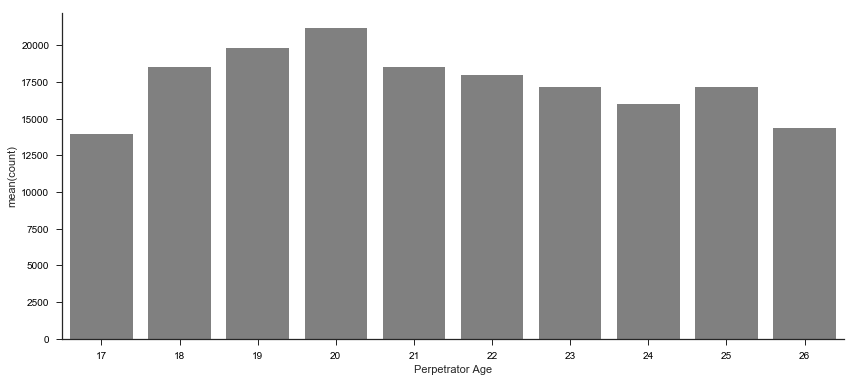

In [6]:
#plotting a bar chart to identify the top the crime perpetuator age

sns.set(style="ticks")
clrs = ['grey' ]# if (x < max(values)) else 'red' for x in values

# This Function takes as input a custom palette
g = sns.barplot(x="Perpetrator Age", y='count',data=df_homicide_california_age,palette=clrs)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(14,6)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelcolor="black")
plt.show()

##### Note: The above analysis shows that most of the crimes where done by people around the age of 20. 

In [7]:
#writing output to csv file
df_homicide_california_age.to_csv(output_folder+'Crime_perpetrator_Cali_1988.csv', sep=',', encoding='utf-8')

#### Identifying the sex of top 3 age groups.

In [8]:
df_homicide_california_perp_sex = df_homicide.groupby('Perpetrator Sex').sum()
df_homicide_california_perp_sex = df_homicide_california_perp_sex.reset_index()
df_homicide_california_perp_sex = df_homicide_california_perp_sex[['Perpetrator Sex','Victim Count','count']]
df_homicide_california_perp_sex.sort(ascending=False,columns='count',inplace=True)
df_homicide_california_perp_sex


C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Perpetrator Sex,Victim Count,count
1,Male,55318,399541
2,Unknown,19483,190365
0,Female,3942,48548


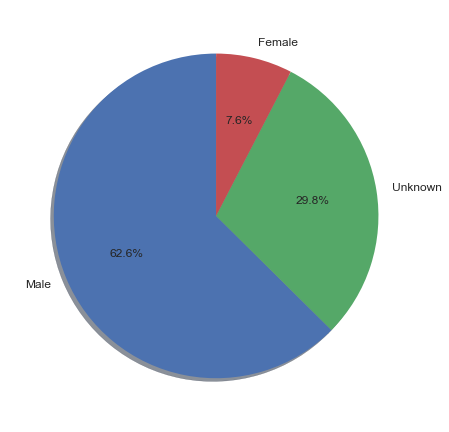

In [9]:
#plot the pie chart 

ax1 = plt.subplot(121, aspect='equal')
df_homicide_california_perp_sex.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=True, labels=df_homicide_california_perp_sex['Perpetrator Sex'], legend = False, fontsize=12,
                                     figsize=(16, 16),)
ax1.set_ylabel('')
plt.show()

##### Note: Analysis shows that most crimes were commited by guys in the age of 20's in Calfiornia during 1990's.

In [10]:
#writing output to csv file
df_homicide_california_perp_sex.to_csv(output_folder+'Crime_perpetrator_Cali_sex_1988.csv', sep=',', encoding='utf-8')

#### Identifying the race of people arrested in 1990's at 20's

In [11]:
#writing output to csv file
df_homicide_california_crime.to_csv(output_folder+'Crime_type_Cali.csv', sep=',', encoding='utf-8')df_homicide_20s = df_homicide[df_homicide['Perpetrator Age'] == 20]
df_homicide_20s = df_homicide_20s[df_homicide_20s['Perpetrator Sex'] == 'Male']

df_homicide_california_perp_race20 = df_homicide_20s.groupby(['Perpetrator Race']).sum()
df_homicide_california_perp_race20 = df_homicide_california_perp_race20.reset_index()
df_homicide_california_perp_race20


,Perpetrator Race,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count,count
0,Asian/Pacific Islander,70492253,462813,2927,7192,122,139,232
1,Black,3706636085,22055954,286579,318745,998,4675,11047
2,Native American/Alaska Native,42908139,267427,887,3890,16,47,134
3,Unknown,47535333,295424,3095,5236,18,92,148
4,White,2472971419,15874624,152711,237394,1196,2959,7956


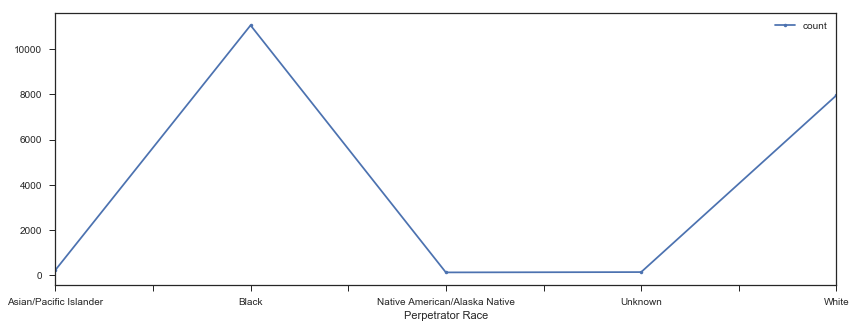

In [12]:
#plot a simple line chart to represent the various perpetrator races and their murder count 

#df_subject_dirs_sorted_violence['Word'] = df_subject_dirs_sorted_violence['Word'].str.split().str.get(0)
df_homicide_california_perp_race20.plot(x='Perpetrator Race', y='count', marker='.',figsize=(14, 5))
plt.show()

##### Note: Analysis indicates that most number of people who committed crime in the age of 20's where BLACK.

In [13]:
#writing output to csv file
df_homicide_california_perp_race20.to_csv(output_folder+'Cali_crime_perpetrator_race_1988.csv', sep=',', encoding='utf-8')

In [14]:
# Grouping the data set by victim race where perpetrator in BLACK

df_homicide_20s_blk = df_homicide[df_homicide['Perpetrator Age'] == 20]
df_homicide_20s_blk = df_homicide_20s_blk[df_homicide_20s_blk['Perpetrator Sex'] == 'Male']
df_homicide_20s_blk = df_homicide_20s_blk[df_homicide_20s_blk['Perpetrator Race'] == 'Black']

df_homicide_20s_blk_murder = df_homicide_20s_blk.groupby(['Perpetrator Race','Victim Race']).sum()
df_homicide_20s_blk_murder = df_homicide_20s_blk_murder.reset_index()
df_homicide_20s_blk_murder

,Perpetrator Race,Victim Race,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count,count
0,Black,Asian/Pacific Islander,31833059,167901,2166,3314,10,53,84
1,Black,Black,2985211732,17769252,220508,238018,779,3399,8900
2,Black,Native American/Alaska Native,5812033,35925,52,450,5,20,18
3,Black,Unknown,25439317,118107,937,6002,9,39,59
4,Black,White,658339944,3964769,62916,70961,195,1164,1986


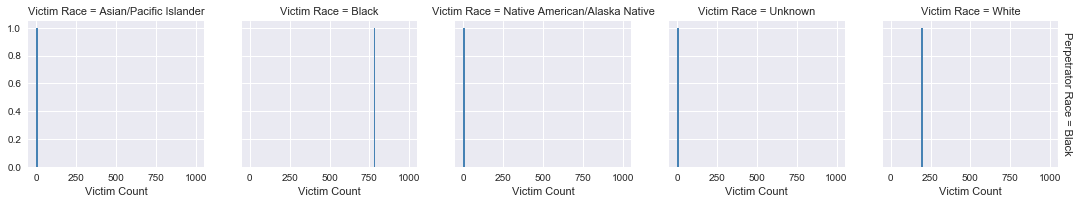

In [15]:
#plot a multiple histogram to represent the various perpetrator races and their murder count 

sns.set(style="darkgrid")
g = sns.FacetGrid(df_homicide_20s_blk_murder, row='Perpetrator Race', col="Victim Race", margin_titles=True)
bins = np.linspace(0, 1000, 100)
g.map(plt.hist, "Victim Count", color="steelblue", bins=bins, lw=0)

plt.show()

##### Note: The above graph depicts the number of people of other races murdered by black people. The x-axis indicates the number of people murdered and each graph represents the various race targeted by black people.

In [16]:
#writing output to csv file
df_homicide_20s_blk_murder.to_csv(output_folder+'Race_wars_Cali_1988.csv', sep=',', encoding='utf-8')